# 作业内容

> 基于阿尔法衰变半衰期，推导最小二乘法公式并用Latex在Markdown cell中打出来；

> 导入数据，运用最小二乘法，使用前19个点拟合，并预测第20个点的值，与真实值进行比较。

# 参考答案

> 1， 理论部分

由公式：

$$ \log_{10} W = C - \frac{D}{\sqrt{E_\alpha}} $$

定义：

$$ y = \log_{10}{W} $$

$$ x = 1/\sqrt{E_{\alpha}} $$

记:

$$C = b, -D = a$$

所以有：

$$ y = ax + b $$

**Case 1**

使用L2 Loss (MSE)，有：

$$ l(a, b) = \sum_{i}^{n}{(y_i - \hat{y_i}})^2 $$

其中，

$$ \hat{y_i} = ax_i + b $$

分别求损失函数对两个参数的偏导数，有：

$$ \Lambda_a = \frac{\partial l}{\partial a} = \sum_{i}^{n}{2(y_i - ax_i - b)(-x_i)} $$

$$ \Lambda_b = \frac{\partial l}{\partial b} = \sum_{i}^{n}{2(y_i - ax_i - b)(-1)} $$

令它们等于0，可得：

$$ \sum_{i}^{n}{y_i x_i} - a\sum_{i}^{n}{(x_i)^2} - b\sum_{i}^{n}{x_i} = 0 \ \ \ \ (1)$$

$$ \sum_{i}^{n}{y_i} - a\sum_{i}^{n}{x_i} - b\sum_{i}^{n}{1} = 0 \ \ \ \ (2)$$

对(1)式乘上$\sum_{i}^{n}{1}$， 对(2)式乘上$\sum_{i}^{n}{x_i}$，可得：

$$ n\sum_{i}^{n}{y_i x_i} - an\sum_{i}^{n}{(x_i)^2} - bn\sum_{i}^{n}{x_i} = 0 \ \ \ \ (3)$$

$$ \sum_{i}^{n}{y_i}\sum_{i}^{n}{x_i} - a(\sum_{i}^{n}{x_i})^2 - bn\sum_{i}^{n}{x_i} = 0 \ \ \ \ (4)$$

很显然地，有：

$$ a = \frac{n\sum_{i}^{n}{y_i x_i}-\sum_{i}^{n}{y_i}\sum_{i}^{n}{x_i}}{n\sum_{i}^{n}{x_i^2} - (\sum_{i}^{n}{x_i})^2} $$

$$ b = \frac{\sum_{i}^{n}{y_i} - a\sum_{i}^{n}{x_i}}{n} $$

特别地，注意到这里的式子里面有n，所以对a而言，分子分母同时除以一个n或者除以n平方，都可以得到平均值的表达式；对b而言，裂项之后的结果两项都是平均值。

所以同样可以得到另外一套结果：

$$ a = \frac{\bar{y_i x_i} - \bar{y_i}\bar{x_i}}{\bar{x_i^2} - \bar{x_i}^2} $$

$$ b = \bar{y_i} - a\bar{x_i} $$

**Case 2**

以上是选用MSE的结果，如果选择MAE，则是：

$$ l(a, b) = \sum_{i}^{n}{\sqrt{(y_i - \hat{y_i}})^2} $$

其中，

$$ \hat{y_i} = ax_i + b $$

分别求损失函数对两个参数的偏导数，有：

$$ \frac{\partial l}{\partial a} = \sum_{i}^{n}{\frac{2(y_i - ax_i - b)(-x_i)}{|y_i - ax_i - b|}} $$

$$ \frac{\partial l}{\partial b} = \sum_{i}^{n}{\frac{2(y_i - ax_i - b)(-1)}{|y_i - ax_i - b|}} $$

记：

$$ |y_i - ax_i - b| = \Lambda_i $$

令它们等于0，可得：

$$ \sum_{i}^{n}{y_i x_i / \Lambda_i} - a\sum_{i}^{n}{x_i^2 / \Lambda_i} - b\sum_{i}^{n}{x_i / \Lambda_i} = 0 \ \ \ \ (5)$$

$$ \sum_{i}^{n}{y_i / \Lambda_i} - a\sum_{i}^{n}{x_i / \Lambda_i} - b\sum_{i}^{n}{1 / \Lambda_i} = 0 \ \ \ \ (6)$$

同样地，对(5)式乘上$\sum_{i}^{n}{1 / \Lambda_i}$， 对(6)式乘上$\sum_{i}^{n}{x_i / \Lambda_i}$，可得：

$$ \sum_{i}^{n}{1 / \Lambda_i}\sum_{i}^{n}{y_i x_i / \Lambda_i} - a\sum_{i}^{n}{1 / \Lambda_i}\sum_{i}^{n}{x_i^2 / \Lambda_i} - b\sum_{i}^{n}{1 / \Lambda_i}\sum_{i}^{n}{x_i / \Lambda_i} = 0 \ \ \ \ (7)$$

$$ \sum_{i}^{n}{x_i / \Lambda_i}\sum_{i}^{n}{y_i / \Lambda_i} - a(\sum_{i}^{n}{x_i / \Lambda_i})^2 - b\sum_{i}^{n}{x_i / \Lambda_i}\sum_{i}^{n}{1 / \Lambda_i} = 0 \ \ \ \ (8)$$

显然，可得：

$$ a = \frac{\sum_{i}^{n}{1 / \Lambda_i}\sum_{i}^{n}{y_i x_i / \Lambda_i} - \sum_{i}^{n}{x_i / \Lambda_i}\sum_{i}^{n}{y_i / \Lambda_i}}{\sum_{i}^{n}{1 / \Lambda_i}\sum_{i}^{n}{x_i^2 / \Lambda_i} - (\sum_{i}^{n}{x_i / \Lambda_i})^2} $$

$$ b = \frac{\sum_{i}^{n}{y_i / \Lambda_i} - a\sum_{i}^{n}{x_i / \Lambda_i}}{\sum_{i}^{n}{1 / \Lambda_i}} $$

> 2，编程部分

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load data
data = pd.read_csv('./data/alpha_decay.csv')

#unit conversion
def UnitConversion(unit):
    if unit not in ['microsecond', 'second', 'day', 'month', 'year']:
        raise Exception('Invalid unit.')
    conv_rate = 1
    if unit == 'microsecond':
        conv_rate = 1e-6
    if unit == 'day':
        conv_rate = 3600 * 24
    if unit == 'month':
        return 3600 * 24 * 30
    if unit == 'year':
        conv_rate = 3600 * 24 * 365
    return conv_rate

data['tau_second'] = [UnitConversion(item) for item in data['tau_units']] * data['tau_half']

#check
data.head(10)

,nucleus,Ealpha,tau_half,tau_units,tau_second
0,Po206,5.22,8.80,day,7.603200e+05
1,Po208,5.11,2.90,year,9.145440e+07
2,Po210,5.31,138.00,day,1.192320e+07
3,Po212,8.78,0.30,microsecond,3.000000e-07
4,Po214,7.68,164.00,microsecond,1.640000e-04
5,Po216,6.78,0.15,second,1.500000e-01
6,U228,6.69,9.10,month,2.358720e+07
7,U230,5.89,20.80,day,1.797120e+06
8,U232,5.32,72.00,year,2.270592e+09
9,U234,4.77,247000.00,year,7.789392e+12


In [3]:
#define variables
x = np.sqrt(1 / data['Ealpha'])
W = np.log(2) / data['tau_second']
y = np.log10(W)
print('x: {}\ny: {}'.format(x.values, y.values))

x: [0.43768811 0.44237396 0.43396304 0.33748365 0.36084392 0.38404769
 0.38662234 0.41204282 0.43355498 0.45786855 0.47192918 0.48795004
 0.42640143 0.4397995  0.45175395 0.46324105 0.39872611 0.40422604
 0.4152274  0.43073049]
y: [ -6.04017095  -8.12037914  -7.23556737   6.36370421   3.62598161
   0.6647342   -7.53185093  -6.41375162  -9.51531364 -13.0506781
 -15.03637905 -17.31215769  -9.5924796  -11.47620704 -13.23662036
 -15.56107113  -6.52382308  -7.30787589  -8.90349381 -11.39834384]


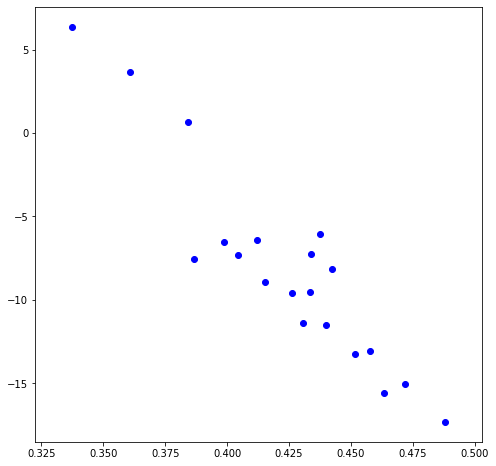

In [4]:
#check x and y in figure
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
ax.scatter(x, y, c='blue', label='data')

In [5]:
#split the last point
x_last = x.values[-1]
y_last = y.values[-1]
x = x[:-1]
y = y[:-1]

**Case 1**

使用MSE:

*Mathod 1*

$$ a = \frac{n\sum_{i}^{n}{y_i x_i}-\sum_{i}^{n}{y_i}\sum_{i}^{n}{x_i}}{n\sum_{i}^{n}{x_i^2} - (\sum_{i}^{n}{x_i})^2} $$

$$ b = \frac{\sum_{i}^{n}{y_i} - a\sum_{i}^{n}{x_i}}{n} $$

*Method 2*

$$ a = \frac{\bar{y_i x_i} - \bar{y_i}\bar{x_i}}{\bar{x_i^2} - \bar{x_i}^2} $$

$$ b = \bar{y_i} - a\bar{x_i} $$

In [6]:
#method 1
n = len(x)
a = (n*np.sum(y*x) - np.sum(y)*np.sum(x)) / (n*np.sum(x**2) - np.sum(x)**2)
b = (np.sum(y) - a*np.sum(x)) / n
print('Using method 1: \na = {:.3f}\nb = {:.3f}'.format(a, b))

Using method 1: 
a = -150.403
b = 55.679


In [7]:
#predict
def predict(x, a, b):
    return a*x + b

y_pred = predict(x_last, a, b)
print('prediction: {:.3f}, label: {:.3f}'.format(y_pred, y_last))

prediction: -9.104, label: -11.398


In [8]:
#plot this lines
x_seires = np.linspace(x.min(), x.max(), 100)
y_l2_m1 = predict(x_seires, a, b)
ax.plot(x_seires, y_l2_m1, color='red', label='MSE Method 1')

In [9]:
#method 2
a = (np.mean(y*x) - np.mean(y)*np.mean(x)) / (np.mean(x**2) - np.mean(x)**2)
b = np.mean(y) - a*np.mean(x)
print('Using method 2: \na = {:.3f}\nb = {:.3f}'.format(a, b))

Using method 2: 
a = -150.403
b = 55.679


In [10]:
#predict
y_pred = predict(x_last, a, b)
print('prediction: {:.3f}, label: {:.3f}'.format(y_pred, y_last))

prediction: -9.104, label: -11.398


In [11]:
#plot this lines
x_seires = np.linspace(x.min(), x.max(), 100)
y_l2_m2 = predict(x_seires, a, b)
ax.plot(x_seires, y_l2_m2, color='green', label='MSE Method 2')

**Case 2**

使用MAE:

$$ a = \frac{\sum_{i}^{n}{1 / \Lambda_i}\sum_{i}^{n}{y_i x_i / \Lambda_i} - \sum_{i}^{n}{x_i / \Lambda_i}\sum_{i}^{n}{y_i / \Lambda_i}}{\sum_{i}^{n}{1 / \Lambda_i}\sum_{i}^{n}{x_i^2 / \Lambda_i} - (\sum_{i}^{n}{x_i / \Lambda_i})^2} $$

$$ b = \frac{\sum_{i}^{n}{y_i / \Lambda_i} - a\sum_{i}^{n}{x_i / \Lambda_i}}{\sum_{i}^{n}{1 / \Lambda_i}} $$

$$ |y_i - ax_i - b| = \Lambda_i $$

In [12]:
#When using MAE, we need to loop several iterations
import warnings
warnings.filterwarnings('ignore')

a_current = -10
b_current = 0
epoches = 1000
eps = 1e-3
logging_interval = 10
for epoch in range(1, epoches+1):
    factor = np.abs(y - a_current*x - b_current)
    n = np.sum(1 / factor)
    a_new = (n*np.sum(y*x/factor) - np.sum(y/factor)*np.sum(x/factor)) / (n*np.sum(x**2/factor) - np.sum(x/factor)**2)
    b_new = (np.sum(y/factor) - a_new*np.sum(x/factor)) / n
    if epoch%logging_interval == 0:#print the log
        print('At epoch {}, a = {:.3f} and b = {:.3f}'.format(epoch, a_current, b_current))
    if np.isclose(a_new, a_current, atol=eps) and np.isclose(b_new, b_current, atol=eps):#early stopping
        print('Early stopping at epoch {}, a = {:.3f} and b = {:.3f}'.format(epoch, a_new, b_new))
        break
    else:
        a_current = a_new
        b_current = b_new
print('Finally, a = {:.3f}\nb = {:.3f}'.format(a_current, b_current))

At epoch 10, a = -145.949 and b = 53.761
Early stopping at epoch 18, a = -145.408 and b = 53.527
Finally, a = -145.410
b = 53.528


In [13]:
#predict
y_pred = predict(x_last, a_current, b_current)
print('prediction: {:.3f}, label: {:.3f}'.format(y_pred, y_last))

prediction: -9.105, label: -11.398


In [14]:
#plot this line
y_l1 = predict(x_seires, a_current, b_current)
ax.plot(x_seires, y_l1, color='black', label='MAE')
ax.legend()

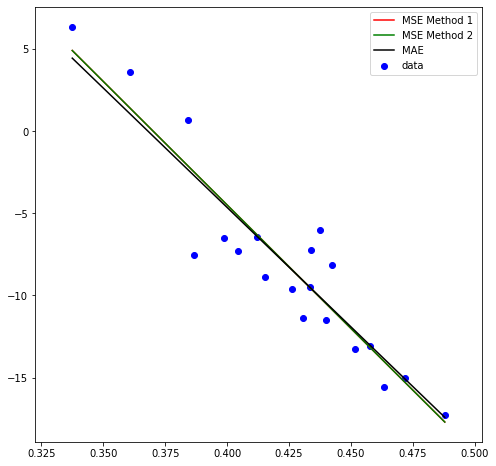

In [15]:
fig

In [17]:
#calculate the predicted tau_half of 20th point
y_l1 = predict(x_last, a, b)
y_l2 = predict(x_last, a_current, b_current)
y_label = y_last
W_l1 = 10**y_l1
W_l2 = 10**y_l2
W_label = 10**y_label
tau_half_l1 = np.log(2) / W_l1
tau_half_l2 = np.log(2) / W_l2
tau_half_label = np.log(2) / W_label
#in second
print('In second:')
print('Using MAE tau_half: {:.3f}\nUsing MSE tau_half: {:.3f}\nReal tau_half: {:.3f}'.format(tau_half_l1, tau_half_l2, tau_half_label))
#in year
conv_rate = 1 / UnitConversion('year')
print('In year:')
print('Using MAE tau_half: {:.3f}\nUsing MSE tau_half: {:.3f}\nReal tau_half: {:.3f}'.format(tau_half_l1 * conv_rate, 
                                                                                             tau_half_l2 * conv_rate, 
                                                                                             tau_half_label * conv_rate))

In second:
Using MAE tau_half: 881062446.551
Using MSE tau_half: 881923903.681
Real tau_half: 173448000000.000
In year:
Using MAE tau_half: 27.938
Using MSE tau_half: 27.966
Real tau_half: 5500.000
